<a href="https://colab.research.google.com/github/SimonBurmer/Jupyter-Notebook/blob/master/Tensorflow_Sklearn_Heart_Disease_Dataset_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload file

---



In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv



# Load und Show Datafram

---



Data contains;



*   age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import io


# Load dataset
df_heart = pd.read_csv(io.StringIO(uploaded['heart.csv'].decode('utf-8')))
display(df_heart.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Analyze data

---



In [5]:
df_heart.isnull().sum().sort_values(ascending = False) #show number of nan Values

target      0
thal        0
ca          0
slope       0
oldpeak     0
exang       0
thalach     0
restecg     0
fbs         0
chol        0
trestbps    0
cp          0
sex         0
age         0
dtype: int64

In [6]:
print(48*"-")
display(df_heart.describe())
print(48*"-")
print(df_heart.shape) #303 entries and 14 features
print(48*"-")

------------------------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


------------------------------------------------
(303, 14)
------------------------------------------------


In [7]:
df_heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


**show dependencies**

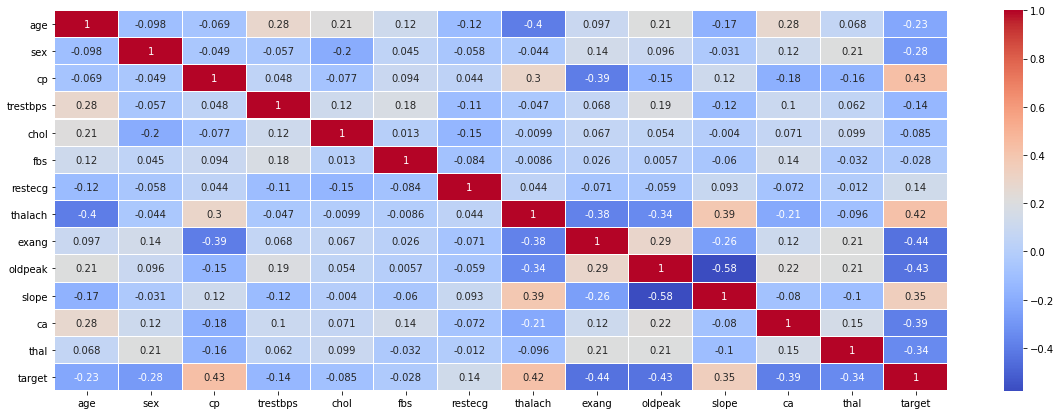

In [47]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.heatmap(df_heart.corr(),linewidths=.01, annot = True, cmap='coolwarm')
plt.show()

**Plot data**

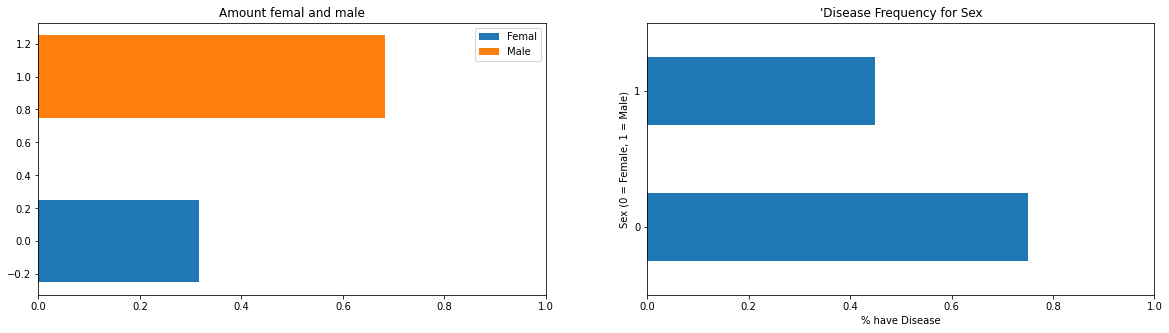

In [54]:
plt.figure(figsize= (20,5))
plt.subplot(1,2,1)
meanFemale = len(df_heart[df_heart.sex == 0])/len(df_heart)
meanMale = len(df_heart[df_heart.sex == 1])/len(df_heart)
plt.title("Amount femal and male")
plt.barh(0, meanFemale, height= 0.5,label=  "Femal")
plt.barh(1, meanMale,height= 0.5, label = "Male")
plt.legend()
plt.xlim(xmax = 1)


plt.subplot(1,2,2)
df_heart.groupby('sex').target.mean().plot(kind='barh')
plt.title("'Disease Frequency for Sex")
plt.xlabel('% have Disease')
plt.ylabel('Sex (0 = Female, 1 = Male)')
plt.xlim(xmax = 1)
plt.show()

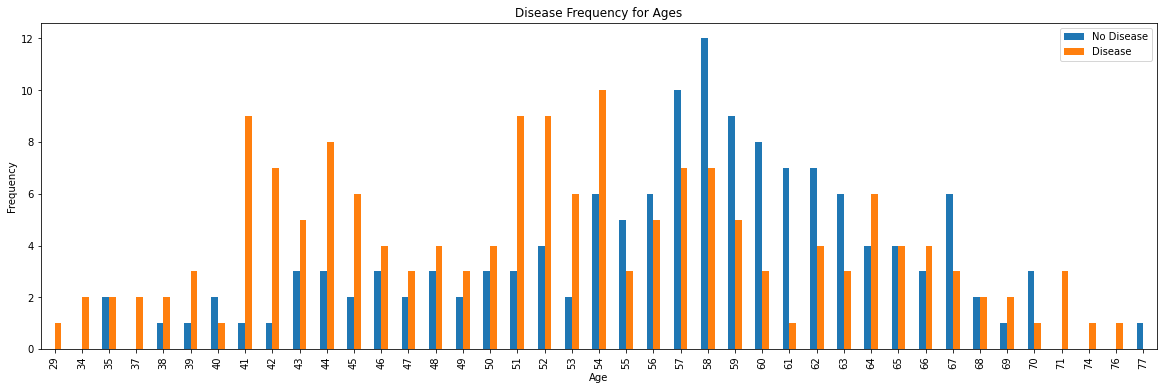

In [53]:
pd.crosstab(df_heart.age,df_heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["No Disease","Disease"])
plt.show()

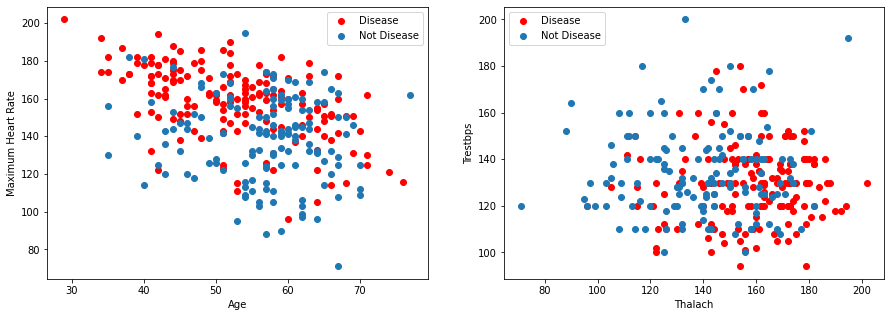

In [43]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.scatter(x=df_heart.age[df_heart.target==1], y=df_heart.thalach[(df_heart.target==1)], c="red")
plt.scatter(x=df_heart.age[df_heart.target==0], y=df_heart.thalach[(df_heart.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")


plt.subplot(1,2,2)
plt.scatter(x=df_heart.thalach[df_heart.target==1], y=df_heart.trestbps[(df_heart.target==1)], c="red")
plt.scatter(x=df_heart.thalach[df_heart.target==0], y=df_heart.trestbps[(df_heart.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Thalach")
plt.ylabel("Trestbps")
plt.show()

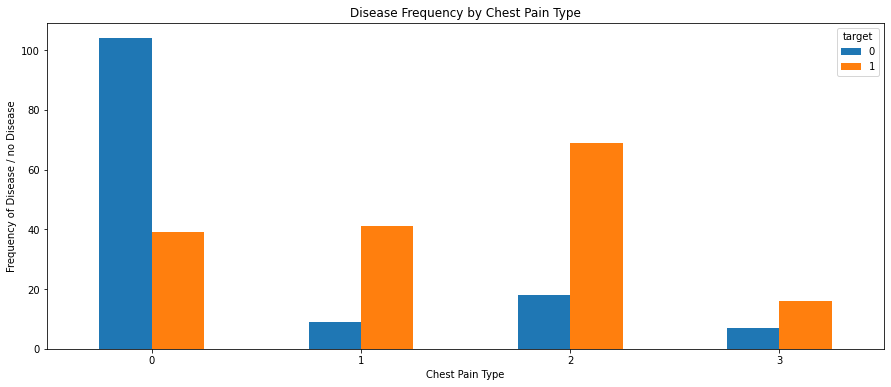

In [55]:
pd.crosstab(df_heart.cp,df_heart.target).plot(kind="bar",figsize=(15,6))
plt.title('Disease Frequency by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease / no Disease')
plt.show()

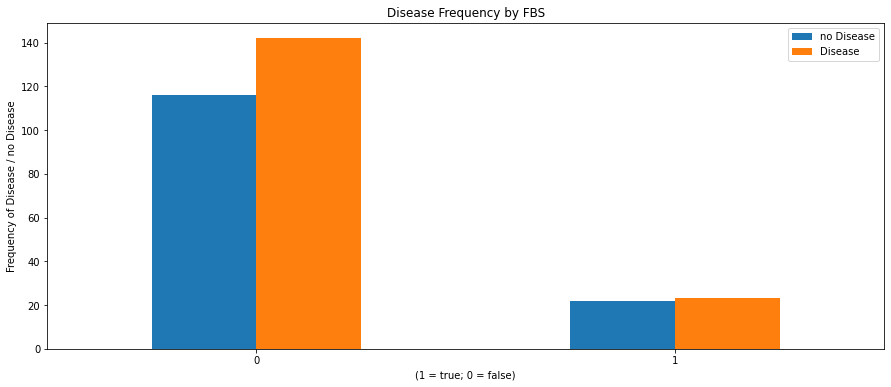

In [60]:
pd.crosstab(df_heart.fbs,df_heart.target).plot(kind="bar",figsize=(15,6))
plt.title('Disease Frequency by FBS')
plt.xlabel('(1 = true; 0 = false)')
plt.legend(["no Disease", "Disease"])
plt.ylabel('Frequency of Disease / no Disease')
plt.xticks(rotation = 0)
plt.show()

# **Data Preprocessing**

---



'target', 'cp', 'thal' and 'slope' are categorical variables thats why i turn them into dummy variables.

In [109]:
hot_cp = pd.get_dummies(df_heart['cp'], prefix = "cp")
hot_thal = pd.get_dummies(df_heart['thal'], prefix = "thal")
hot_slope = pd.get_dummies(df_heart['slope'], prefix = "slope")

Y = df_heart['target']
Y_pp = pd.get_dummies(Y, prefix = "target")

print(48*"-")
print(df_heart.slope.head())
print(48*"-")
print("becoms:")
print(48*"-")
print(hot_slope.head())
print(48*"-")

------------------------------------------------
0    0
1    0
2    2
3    2
4    2
Name: slope, dtype: int64
------------------------------------------------
becoms:
------------------------------------------------
   slope_0  slope_1  slope_2
0        1        0        0
1        1        0        0
2        0        0        1
3        0        0        1
4        0        0        1
------------------------------------------------


In [136]:
X_pp = df_heart.drop(["cp","thal","slope","target"], axis=1)
X_pp = pd.concat([X_pp,hot_cp,hot_thal,hot_slope], axis=1)
display(X_pp.head())

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1


**Normalize Data**

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_pp_st = scaler.fit_transform(X_pp)
X_pp_st = pd.DataFrame(data=X_pp_st)
display(X_pp_st.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.952197,0.681005,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-0.714429,-0.945384,-0.444554,-0.634648,3.489114,-0.081514,3.979112,-1.100763,-0.793116,3.664502,-0.926766,-0.939142
1,-1.915313,0.681005,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-0.714429,-0.945384,-0.444554,1.575677,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,3.664502,-0.926766,-0.939142
2,-1.474158,-1.468418,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,-0.714429,-0.945384,2.249444,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,-0.272888,-0.926766,1.064802
3,0.180175,0.681005,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,-0.714429,-0.945384,2.249444,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,-0.272888,-0.926766,1.064802
4,0.290464,-1.468418,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,-0.714429,1.057772,-0.444554,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,-0.272888,-0.926766,1.064802


In [0]:
from sklearn.model_selection import train_test_split

# Split the data set into training and testing
#raw data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)
#Hot encoded data 
x_train_pp, x_test_pp, y_train_pp, y_test_pp = train_test_split(X_pp,Y,test_size = 0.2,random_state=0)
#Hot encoded data and standardization
x_train_pp_st, x_test_pp_st, y_train_pp_st, y_test_pp_st = train_test_split(X_pp_st,Y,test_size = 0.2,random_state=0)

# **Sklearn Classifier**

---



------------------------------------------------------------------------------------------------
accuracy:  0.8183870967741935
------------------------------------------------------------------------------------------------


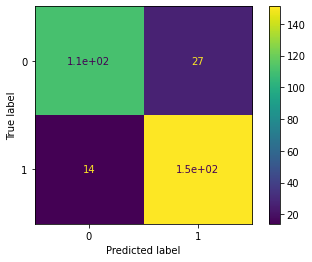

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics #for checking the model accuracy

model = LogisticRegression()
model.fit(x_train_pp_st, y_train_pp_st)
#prediction=model.predict(x_test_pp)

score_lr = cross_val_score(model, X_pp_st, Y, cv=10)
print("--" *48)
print("accuracy: ", score_lr.mean())
print("--" *48)

metrics.plot_confusion_matrix(model,X_pp_st,Y)
plt.show()

------------------------------------------------------------------------------------------------
accuracy Model_pp:  0.7387096774193547
------------------------------------------------------------------------------------------------
accuracy Model_pp_st:  0.7449462365591397
------------------------------------------------------------------------------------------------


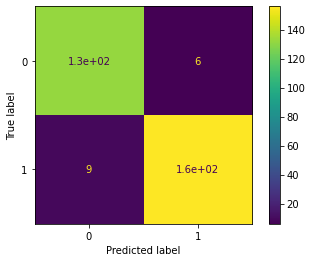

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import graphviz 


#pp data 
model_pp = DecisionTreeClassifier()
model_pp.fit(x_train_pp, y_train_pp)
score_dt = cross_val_score(model_pp, X_pp, Y, cv=10)
print("--" *48)
print("accuracy Model_pp: ", score_dt.mean())


#pp_st data
model_pp_st = DecisionTreeClassifier()
model_pp_st.fit(x_train_pp_st, y_train_pp_st)
score_dt = cross_val_score(model_pp_st, X_pp_st, Y, cv=10)
print("--" *48)
print("accuracy Model_pp_st: ", score_dt.mean())
print("--" *48)

metrics.plot_confusion_matrix(model,X_pp,Y)
plt.show()

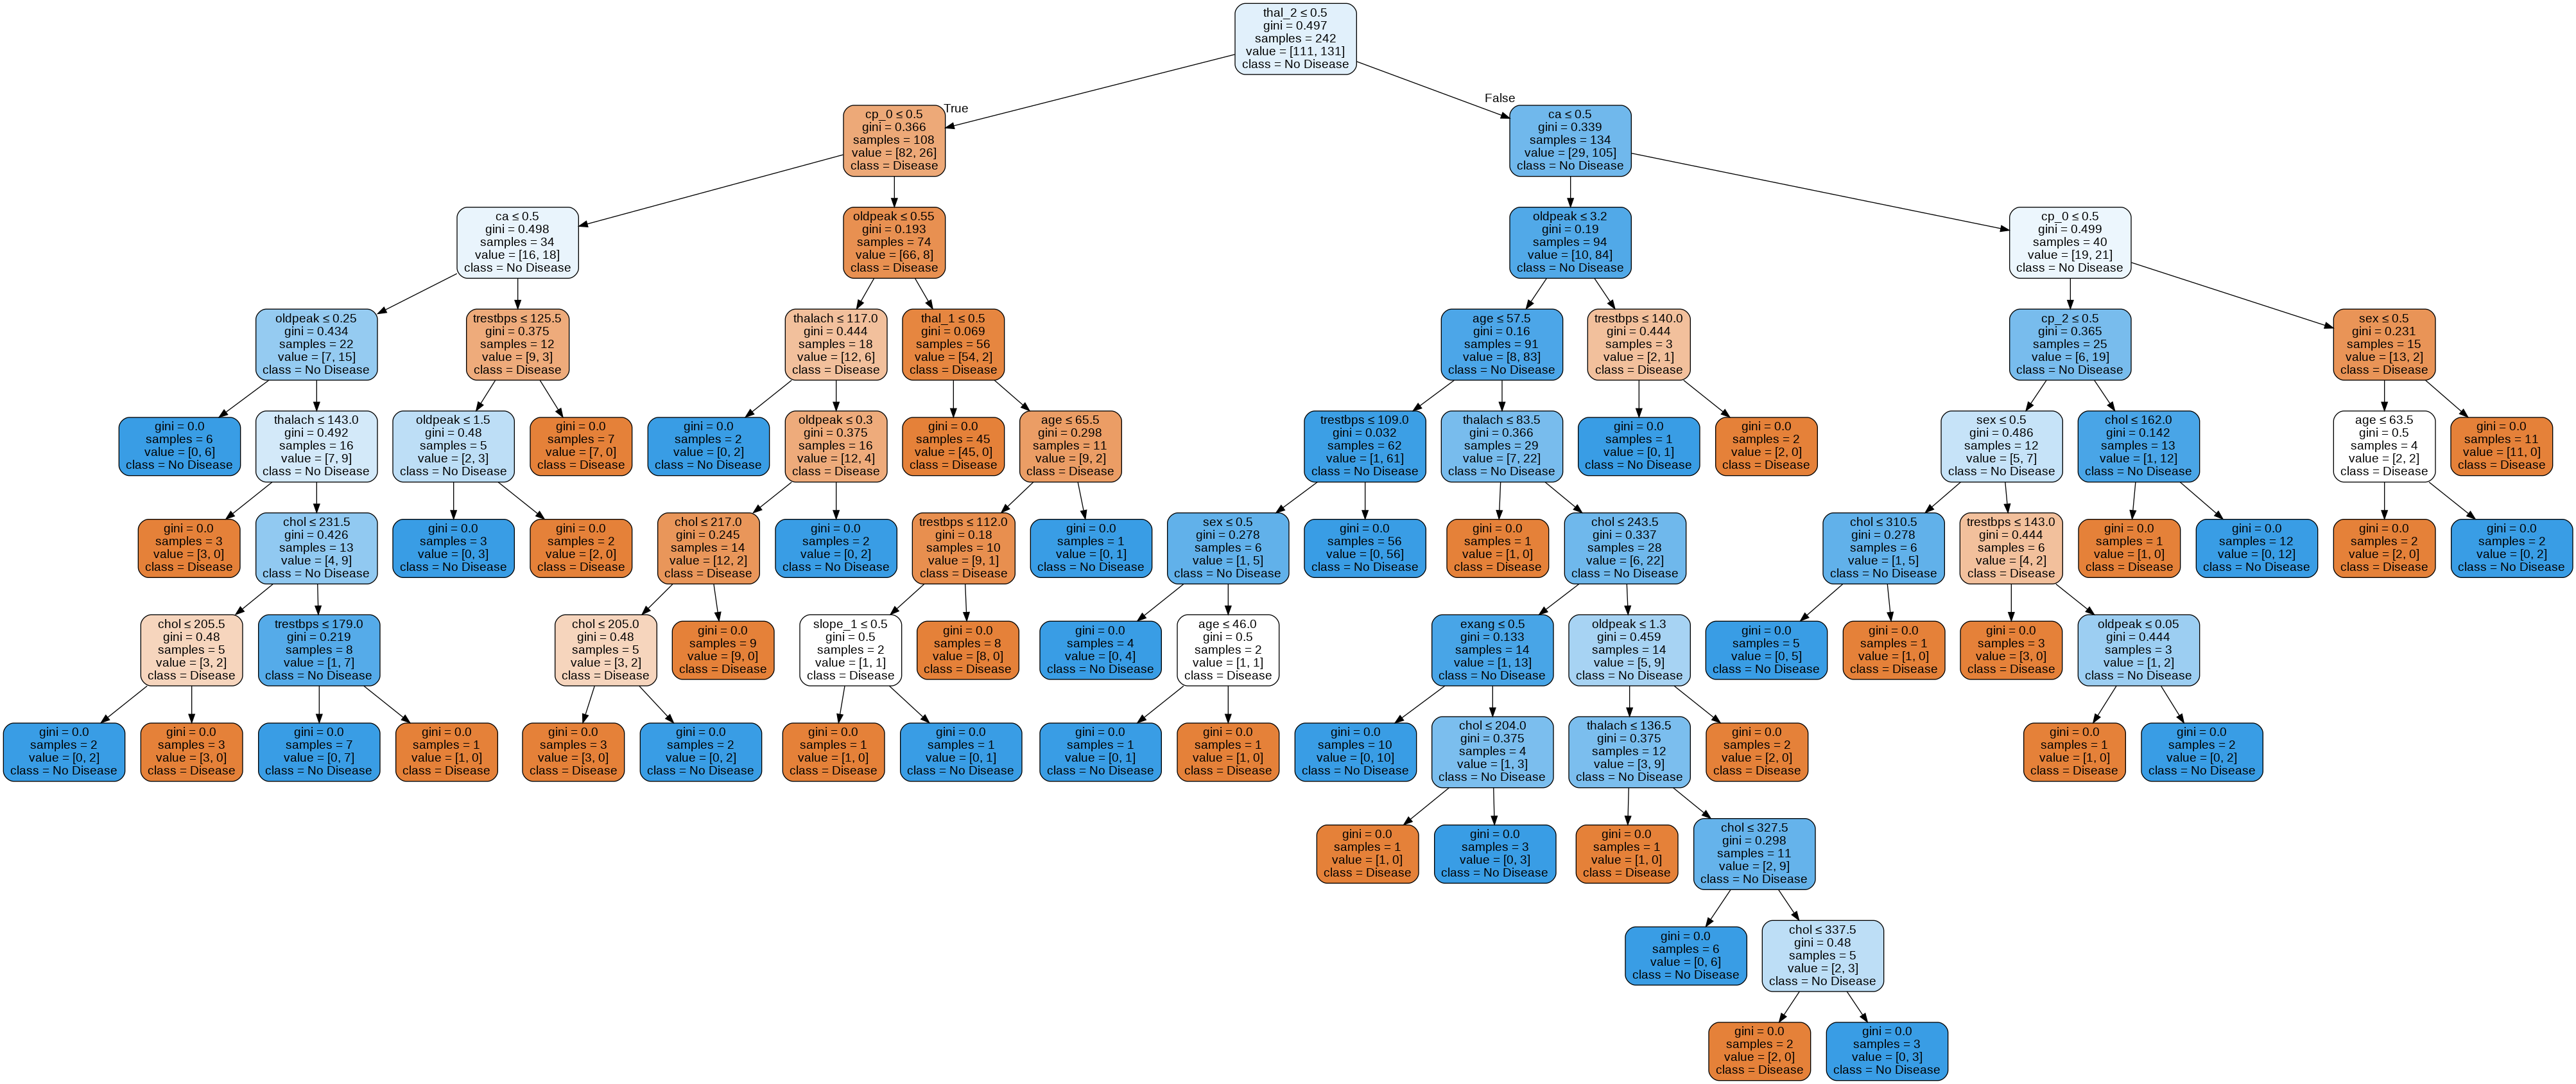

In [207]:
from IPython.display import Image

dot_data = export_graphviz(model, feature_names= list(X_pp.columns),  class_names= ["Disease","No Disease"],filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(format="png")
Image("Source.gv.png", height= 450)